In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st 
from scipy.stats import linregress
import gmaps

#Import API key
from config import g_key


In [11]:
#Save from CSVs
pk_go_csv = pd.read_csv("Resources/pkmn-go.csv")
poke_spawns = pd.read_csv("Resources/pokemon-spawns.csv")

merged_csv = pd.merge(pk_go_csv, poke_spawns, on="name")
merged_csv.head(None)

cleaned_csv = merged_csv.drop_duplicates()

cleaned_csv.reset_index(drop=True).head(None)

,name,stamina,atk,def,capture_rate,flee_rate,spawn_chance,primary,secondary,cp,url,s2_id,s2_token,num,lat,lng,encounter_ms,disppear_ms
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182898735737209000,808fca40de3,1,37.352721,-121.965752,1469520961740,1469520283284
1,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182927600064922000,808fb000163,1,37.386986,-122.173674,-1,1469520478385
2,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182910327853941000,808fbfb5ca1,1,37.562587,-122.033978,1469522340772,1469521691605
3,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182956200252146000,808f95fd6c5,1,37.577153,-122.082546,1469522541812,1469521693152
4,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...,-9182984574953587000,808f7c2eb87,1,37.717652,-122.453226,1469522434748,1469521960685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281143,Dragonair,122,170,152,0.08,0.06,2.0,Dragon,NaN,1760,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,-9185790380451299000,8085845142b,148,37.860065,-122.485598,1469558403276,1469557938584
281144,Dragonair,122,170,152,0.08,0.06,2.0,Dragon,NaN,1760,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,-9185790380451299000,8085845142b,148,37.860065,-122.485598,1469558403276,1469557938645
281145,Dragonair,122,170,152,0.08,0.06,2.0,Dragon,NaN,1760,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,-9185794164317487000,808580e0793,148,37.806800,-122.423853,1469570699180,1469570176378
281146,Dragonair,122,170,152,0.08,0.06,2.0,Dragon,NaN,1760,http://cdn.bulbagarden.net/upload/thumb/9/93/1...,-9185794164317487000,808580e0793,148,37.806800,-122.423853,1469570699180,1469570176379


In [33]:
poketype = cleaned_csv.groupby('primary')
spawn_chance = poketype['spawn_chance'].mean()
spawn_df = spawn_chance.rename_axis('Primary').to_frame('Average Spawn Chance')
spawn_df.sort_values(by='Average Spawn Chance', ascending = False)
spawn_df.head(None)

,Average Spawn Chance
Primary,
Bug,379.833365
Dragon,29.236729
Electric,46.232262
Fairy,90.213858
Fighting,77.092287
Fire,67.953618
Ghost,76.065783
Grass,86.055763
Ground,75.094822


In [52]:
dragon_df = cleaned_csv[cleaned_csv['primary'] == 'Dragon']
print(dragon_df.name.value_counts().head())
normal_df = cleaned_csv[cleaned_csv['primary'] == 'Normal']
print(normal_df.name.value_counts().head())
ice_df = cleaned_csv[cleaned_csv['primary'] == 'Ice']
ice_df.name.value_counts().head()
normal_df.cp.max()

Dratini      678
Dragonair     19
Name: name, dtype: int64
Pidgey     40976
Rattata    28183
Spearow    13679
Doduo      10904
Eevee       9089
Name: name, dtype: int64


3135

In [10]:
#Access maps with API key
gmaps.configure(api_key=g_key)

highest_avg_cp = cleaned_csv[cleaned_csv['primary'] == 'Dragon']
locations = highest_avg_cp[["lat", "lng"]]
cp = cleaned["spawn_chance"].astype(float)
# Using the template add marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>CP</dt><dd>{cp}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
poke_info = [info_box_template.format(**row) for index, row in highest_avg_cp.iterrows()]

#Plot Heatmap
fig = gmaps.figure()
#Add markers
markers = gmaps.marker_layer(locations, info_box_content=poke_info)
fig.add_layer(markers)
#Create Heatlayer
heat_layer = gmaps.heatmap_layer(locations, cp, dissipating=False, max_intensity=2000, point_radius=1)

#Add layer
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
#Access maps with API key
gmaps.configure(api_key=g_key)

highest_avg_cp = cleaned_csv[cleaned_csv['primary'] == 'Fairy']
locations = highest_avg_cp[["lat", "lng"]]
cp = highest_avg_cp["spawn_chance"].astype(float)
# Using the template add marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>CP</dt><dd>{cp}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
poke_info = [info_box_template.format(**row) for index, row in highest_avg_cp.iterrows()]

#Plot Heatmap
fig = gmaps.figure()
#Add markers
markers = gmaps.marker_layer(locations, info_box_content=poke_info)
fig.add_layer(markers)
#Create Heatlayer
heat_layer = gmaps.heatmap_layer(locations, weights, dissipating=False, max_intensity=2000, point_radius=1)

#Add layer
fig.add_layer(heat_layer)

fig

NameError: name 'weights' is not defined

In [18]:
spawn_chance = poketype['capture_rate'].mean()
spawn_df = spawn_chance.rename_axis('Primary').to_frame('Capture Rate')
spawn_df.sort_values(by='Capture Rate', ascending = False)

,Capture Rate
Primary,
Water,0.424168
Poison,0.390533
Psychic,0.389640
Fighting,0.388895
Normal,0.383643
Ground,0.374971
Rock,0.370827
Bug,0.359411
Grass,0.352180


In [6]:
avg_cp = poketype['cp'].mean()
cp_df = avg_cp.rename_axis('Primary').to_frame('Average CP')
cp_df.sort_values(by='Average CP', ascending = True)



,Average CP
Primary,
Poison,742.337472
Psychic,750.301141
Normal,750.316102
Bug,775.204481
Water,805.157419
Ghost,833.060241
Ground,903.521699
Rock,919.005061
Electric,947.103846


In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
poke_group = cleaned_csv.groupby(['primary'])
spawn_mean = poke_group.mean()['spawn_chance']
poke_max = poke_group["cp"].max()
capture_avg = poke_group.mean()["capture_rate"]


poke_table = pd.DataFrame({
    "Average Spawn Chance": drug_mean,
    "Average CP": drug_var,
    "Average Capture Rate": drug_std,
    "Max CP": poke_max,
    })

print("Average by Pokemon Type")
poke_table.sort_values(by='Average CP')

Average by Pokemon Type


,Average Spawn Chance,Average CP,Average Capture Rate,Max CP
primary,,,,
Ghost,76.065783,1390,0.313639,1390
Ice,35.000000,1728,0.240000,1728
Dragon,29.236729,1760,0.313458,1760
Bug,379.833365,2137,0.359411,2137
Electric,46.232262,2155,0.294892,2155
Psychic,105.984917,2199,0.389640,2199
Ground,75.094822,2259,0.374971,2259
Rock,98.861006,2319,0.370827,2319
Fairy,90.213858,2414,0.236853,2414


In [ ]:
plt.scatter(poke_group["Max Temp"], weather_data['Lat'], edgecolors="b", facecolors="skyblue")
plt.title(f"Max Temperature vs Latitude on {today}")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
plt.savefig("../output_data/latitude_vs_max_temp.png")
plt.show()

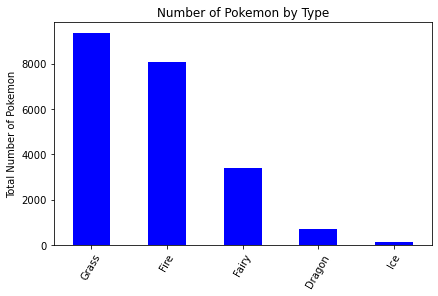

Grass     9353
Fire      8067
Fairy     3406
Dragon     697
Ice        115
Name: primary, dtype: int64

In [28]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
top5_df = cleaned_csv[cleaned_csv["primary"].isin(["Ice",'Fire', 'Fairy', 'Grass', 'Dragon'])]
counts_bar = top5_df["primary"].value_counts()


counts_bar.plot(kind="bar", color="b", rot=60)
plt.tight_layout()
plt.title("Number of Pokemon by Type")
plt.ylabel("Total Number of Pokemon")
plt.show()
counts_bar.head(None)